In [58]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n freq_1.ipynb
%run -i freq_1.ipynb
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [59]:
def create_kernel(im):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
       # Initialize the kernel with ones (allow all frequencies to pass by default)
    kernel = np.ones_like(im)

    # Get the center coordinates for frequency domain
    center_x, center_y = im.shape[0] // 2, im.shape[1] // 2

    # Define offset and spacing for the notches
    offset_list = range(-8, 9)  # Center plus/minus 8 (for 17 noise spots)
    spacing = 30  # Distance between each noise spot
    notch_size = 5  # Width of each notch

    # Place notches in the frequency domain along the horizontal axis
    for i in offset_list:
        if i != 0:  # Skip the central frequency component
            pos_y_plus = center_y + i * spacing
            pos_y_minus = center_y - i * spacing

            # Apply notch if within bounds
            if 0 <= pos_y_plus < im.shape[1]:
                kernel[center_x - notch_size:center_x + notch_size + 1,
                       pos_y_plus - notch_size:pos_y_plus + notch_size + 1] = 0
            if 0 <= pos_y_minus < im.shape[1]:
                kernel[center_x - notch_size:center_x + notch_size + 1,
                       pos_y_minus - notch_size:pos_y_minus + notch_size + 1] = 0

    # Place notches in the frequency domain along the vertical axis
    kernel = np.fft.fftshift(kernel)
    # Visualize the Kernel to confirm it’s correctly positioned without shifting
    plt.figure(figsize=(6, 6))
    plt.imshow(kernel, cmap="gray")
    plt.colorbar()
    plt.title("Kernel Visualization with Notches (No Shift)")
    plt.show()

    return kernel

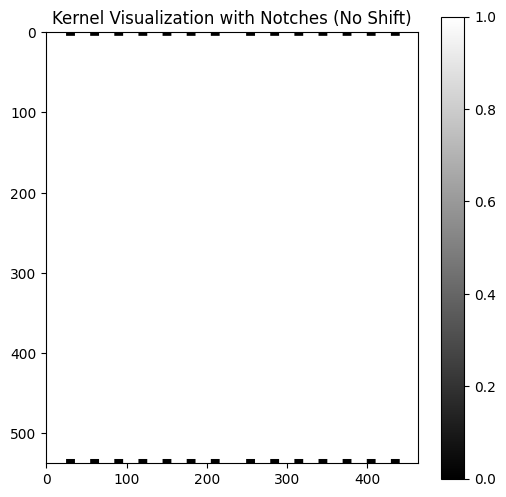

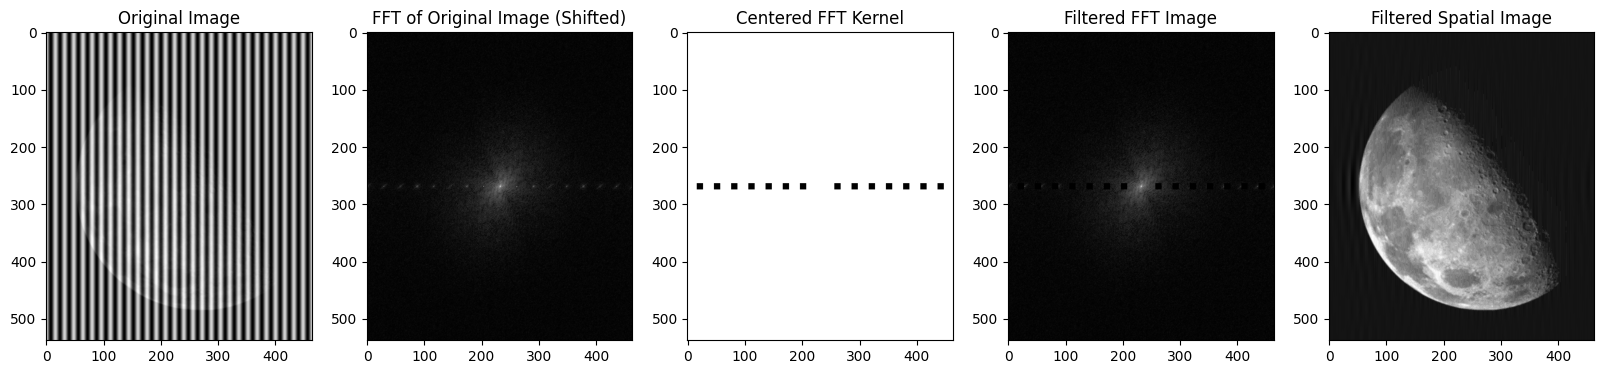

Saving image to: image_processed/moon_filtered.png


In [60]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))